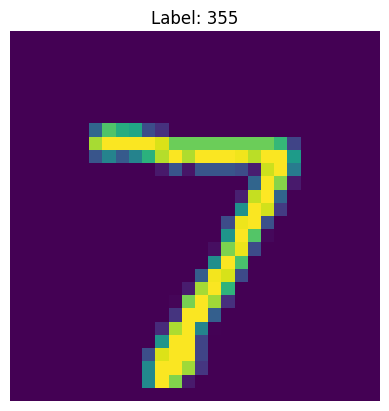

In [53]:
# Digit Recogniser using CNN (MNIST Dataset)

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data: reshape and normalize
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Viewing one example:
plt.imshow(x_test[0].reshape(28, 28), cmap="viridis")
plt.title(f"Label: {np.argmax(x_test[0])}")
plt.axis('off')
plt.show()

Building CNN Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    #Convolutions - filter slides over images to detect patterns
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    #32: Number of filters
    #(3,3): Each filter looks at a 3x3 patch of the image
    #RelU: Keeps only positive values (ignores dark areas)

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    #Max Pooling: Reduces image size by taking maximum value from a patch
    #Zooms out to keep most important parts of image - prevents overfitting

    Flatten(),
    #Flatten: Converts 2D image grid into a 1D vector for Dense layers

    Dense(128, activation='relu'),
    #Dense: A fully connected layer - every neuron is connected to every input

    Dropout(0.5),
    #Randomly "drops" neurons during training to prevent overfitting

    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # Predicts 10 digits (0-9)
])

#Compile and Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.fit(x_train, y_train, epochs=6, batch_size=32, validation_split=0.2, callbacks=[early_stop])

#Evaluate Model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - accuracy: 0.9900 - loss: 0.0332 - val_accuracy: 0.9912 - val_loss: 0.0355
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.9914 - loss: 0.0311 - val_accuracy: 0.9909 - val_loss: 0.0385
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9898 - val_loss: 0.0419
Test loss: 0.0281
Test accuracy: 0.9920


Predict and Visualise

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


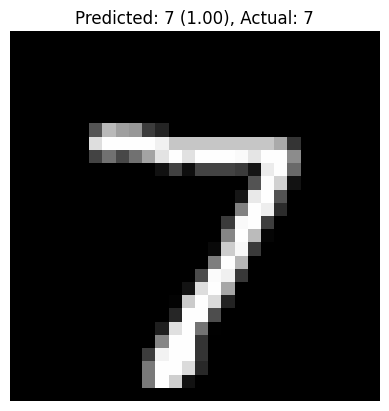

In [54]:
import numpy as np

index = 0 #change this to any index
img = x_test[index].reshape(1, 28, 28, 1)
true_label = np.argmax(y_test[index])

predictions = model.predict(img)[0]
predicted_label = np.argmax(predictions)
confidence = predictions[predicted_label]

plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label} ({confidence:.2f}), Actual: {true_label}")
plt.axis('off')
plt.show()


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


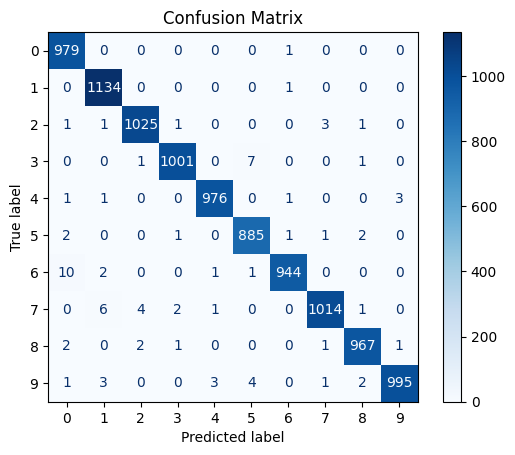

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

#Get predictions and true labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

#Plot confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

Confidence Prediction Visualiser

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


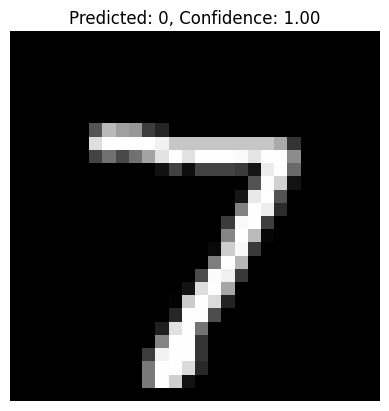

Predicted: 0, Confidence: 1.00
Class probabilities:
[5.7892469e-11 4.4743661e-08 3.4210453e-07 2.4225214e-08 1.7318948e-09
 1.4559663e-10 1.4314781e-14 9.9999964e-01 4.8550630e-12 1.3880704e-08]


In [55]:
#Visualise prediction with confidence
index = 0 #change this to test different images
img = x_test[index].reshape(1, 28, 28, 1)
probs = model.predict(img)[0]
predicted = np.argmax(probs)
confidence = max(probs)

plt.imshow(x_train[index])
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predicted)}, Confidence: {confidence:.2f}")
plt.axis("off")
plt.show()

print(f"Predicted: {np.argmax(predictions[index])}, Confidence: {confidence:.2f}")
print(f"Class probabilities:\n{probs}")

Sanity Check